In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21546 entries, 0 to 21545
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             21546 non-null  int64         
 1   name                   21546 non-null  object        
 2   funding_total_usd      21546 non-null  int64         
 3   status                 21546 non-null  object        
 4   State_code             21546 non-null  object        
 5   City                   21546 non-null  object        
 6   funding_rounds         21546 non-null  int64         
 7   founded_at             21545 non-null  datetime64[ns]
 8   first_funding_at       21545 non-null  datetime64[ns]
 9   hasWebsite             21546 non-null  bool          
 10  company_name           2737 non-null   object        
 11  acquirer_name          2737 non-null   object        
 12  acquirer_country_code  2630 non-null   object        
 13  a

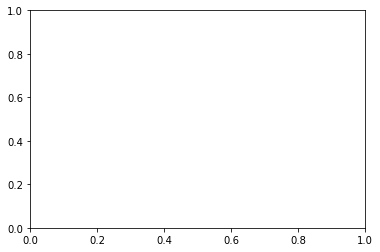

In [146]:
data = pd.read_csv('cleaned.csv')
data['acquired_at'] = pd.to_datetime(data.acquired_at, errors = 'coerce')
data['founded_at'] = pd.to_datetime(data.founded_at, errors = 'coerce')
data['first_funding_at'] = pd.to_datetime(data.first_funding_at, errors = 'coerce')
fig, ax = plt.subplots()
data.info()

In [307]:
fig = plt.figure()
average_funding_per_state = data.groupby(by = 'State_code').funding_total_usd.mean()
average_funding_per_state = average_funding_per_state.nlargest
plt.xticks(rotation=90)
plt.ticklabel_format(style = 'plain')
ax = plt.bar(average_funding_per_state.index,average_funding_per_state.values) 

# ax.hist(x = meanByCity['City'],height = meanByCity['funding_total_usd'])

AttributeError: 'function' object has no attribute 'index'

<AxesSubplot:>

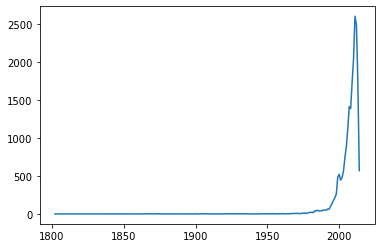

In [83]:
data.founded_at.dt.year.value_counts().sort_index().plot()

<AxesSubplot:>

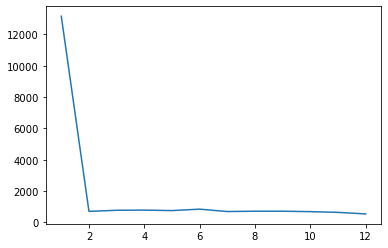

In [85]:
data.founded_at.dt.month.value_counts().sort_index().plot()

<AxesSubplot:>

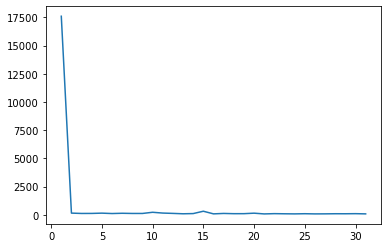

In [89]:
data.founded_at.dt.day.value_counts().sort_index().plot()

In [143]:
other_count = 0
first_count = 0
for i in range(data['founded_at'].size):
    if (data['founded_at'][i].month == 1) and (data['founded_at'][i].day == 1):
        
        first_count+= 1
    else:
        other_count+= 1
print(first_count/(first_count+other_count)) 
#percentage of companies "founded" on january first


0.5974658869395711


<AxesSubplot:xlabel='founded_at'>

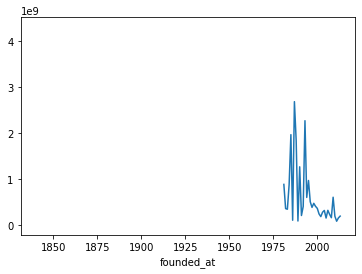

In [121]:
data.groupby(data.founded_at.dt.year).price_amount.mean().plot()

In [187]:
medical = ['Medical','Pharmaceuticals','Biotechnology','Health Care','Health and Wellness','Bio-Pharm','Medical Devices','Health Care Information Technology','Genetic Testing','Electronic Health Records','Bioinformatics','Healthcare Services','Hospitals','Physicians','Therapeutics','Clinical Trials','Health and Insurance','Dental','Medical Professionals','Diagnostics','Diabetes','Psychology','Medical Marijuana Patients','Doctors','Senior Health','Elder Care','mHealth','Synthetic Biology','Biometrics']

manufacuring = ['Manufacturing','Automotive', 'Cars', 'Embedded Hardware and Software','Semiconductors','Sensors','Communications Hardware','Residential Solar','Mobile Devices','Clean Energy','Environmental Innovation','Heavy Industry','Industrial Automation','Nanotechnology','Computers','Commercial Solar','Biotechnology and Semiconductor','Industrial','Semiconductor Manufacturing Equipment','Boating Industry','Wind','Solar']

federal_contracting = ['Federal_Contracting','Law Enforcement','Governments','Ticketing','DOD/Military','Governance','Government Innovation']

renting = ['Renting','Data Centers','Realtors','Vacation Rentals','Music Venues','Self Storage','Office Space','Timeshares','Parking','Rental Housing','Real Estate','Commercial Real Estate','Outdoor Advertising']

fitness = ['Fitness','Sports','Training','Self Development','Nutrition','Exercise','Personal Health','Lifestyle']

science_and_engineering = ['Science_and_Engineering','Aerospace','Space Travel','Robotics','Life Sciences','Neuroscience','Material Science','Renewable Energies','Energy','Humanitarian','Engineering Firms','Energy Management','Energy Efficiency','Green','Energy IT','Water Purification','Industrial Energy Efficiency','Renewable Tech','Natural Resources','Sustainability','Mechanical Solutions']

transportation = ['Transportation','Distribution','Public Transportation','Shipping','Postal and Courier Services','Distributors','Recycling']

banking = ['Banking','Credit','Credit Cards','Venture Capital','Financial Services','Accounting','Insurance','Retirement','Brokers','Home Owners','Angels','Real Estate Investors','Hedge Funds']

labor = ['Labor','Agriculture','Construction','Home & Garden','Home Renovation','Food Processing','Architecture','Farming']

gaming = ['Gaming','Games','Entertainment','Video Games','Gambling','Fantasy Sports','Educational Games','Online Gaming','MMO Games','PC Gaming','Game','Entertainment Industry','Game Mechanics','FreetoPlay Gaming','Digital Entertainment']

art = ['Art','Design','Fashion','Photography','Art','Indoor Positioning','Music Services','Audio','Graphics','Film','Product Design','Content Creators','Interior Design','Lighting','Writers','Creative Industries','Designers','Recipes','Music','Creative','Film Production','News','Publishing','Journalism']

service = ['Service','Hospitality','Travel','Customer Service','Hotels','Weddings','Funeral Industry','Pets','Leisure','Concerts','Adventure Travel','Tourism','Social Travel','Taxis','Travel & Tourism','Service Industries','Nightclubs','Senior Citizens','Cosmetic Surgery','Plumbers','Cooking','Restaurants','Personal Finance']

corporate_services = ['Corporate_Services','Property Management','Digital Rights Management','Legal','Services','Personal Branding','Business Services','Logistics','Consulting','Investment Management','Wealth Management','Supply Chain Management','CRM','Intellectual Asset Management','Recruiting','Unifed Communications','Loyalty Programs','Promotional','Reputation','Market Research','Price Comparison','Project Management','Human Resources','Infrastructure','Product Development Services','Innovation Management','Corporate Wellness','Professional Services','Monetization','Incentives','Logistics Company','Career Planning','Content Delivery','Corporate IT','Enterprise Resource Planning','Collaborative Consumption','Contact Management','Performance Marketing','Opinions','Corporate Training','Business Productivity','Risk Management', 'Licensing','Lead Generation','Offline Businesses','Business Development','Lead Management','Bridging Online and Offline','Employer Benefits Programs','Classifieds','IT Management','Direct Marketing','Advertising Exchanges','Sponsorship','Knowledge Management','Staffing Firms','Fleet Management','Estimation and Quoting','Franchises','Procurement','Translation','Polling','Brand Marketing','Quantitative Marketing','Billing','Career Management','Public Relations','Freelancers']

remove_list = ['Local Businesses','Small and Medium Businesses','Local','Startups','Enterprises','Location Based Services','Communities','Consumers','Synchronization','Advice','Outdoors','Radical Breakthrough Startups','Rapidly Expanding','All Markets','Employment','Lifestyle Businesses','DIY','World Domination','Q&A','Contests','Baby Boomers','Multi-level Marketing','Emerging Markets','Moneymaking','Women','Real Time','Ediscovery','Freemium','Enterprise 2.0','Advanced Materials','Politics','nan','Celebrity','Coworking','Entrepreneur']

retail = ['Retail','Shoes','Consumer Electronics','Auctions','Oil & Gas','Oil and Gas','Displays','Sporting Goods','Cosmetics', 'Electronics','Drones','Consumer Goods','Gift Card','Wine And Spirits','Water','Organic','Utilities','Home Automation','Home Decor','Green Consumer Goods','Beauty','Batteries','Animal Feed','Groceries','Commodities','Golf Equipment','Organic Food','Specialty Foods','Craft Beer','Oil','Specialty Chemicals','Chemicals','Textiles','Tablets','Gas','Bicycles','Farmers Market','Auto','Auto','Toys', 'Tea','Jewelry','Specialty Retail','Textbooks','Dietary Supplements','Twin-Tip Skis','Lifestyle Products','Sunglasses','Baby Accessories','Electric Vehicles','Coffee','Spas']

education = ['Education','Colleges','Teachers','Kids','Tutoring','K-12 Education','High Schools','Technical Continuing Education','All Students','Guides','Skill Assessment','Incubators','Charter Schools','College Recruiting','Alumni','Certification Test','Defense','Language Learning','Testing','English-Speaking','Universities','Registrars','Test and Measurement','Babies','College Campuses','Religion', 'Parenting','Families']

nonprofit = ['Nonprofits','Non Profit','Charity']

market_list = [education,nonprofit,retail,remove_list,corporate_services,service, art, gaming, labor, banking, transportation, science_and_engineering,fitness, renting, federal_contracting, manufacuring, medical]

market_dic = {}
for market in market_list:
    market_dic[market[0]] = market

In [192]:
def market_simplifier(string):
    found = False
    for market in market_list:
        if string in market:
            found = True
            return market[0]
    if found == False:
        return 'Online_Tech'

In [194]:
data['market'] = data['market'].apply(lambda x: market_simplifier(x))

In [224]:
data.head()


,Unnamed: 0,name,funding_total_usd,status,State_code,City,funding_rounds,founded_at,first_funding_at,hasWebsite,company_name,acquirer_name,acquirer_country_code,acquirer_state_code,acquirer_city,acquired_at,price_amount,market
0,0,#waywire,1750000,acquired,NY,New York,1,2012-06-01,2012-06-30,True,#waywire,Waywire Networks,USA,NY,New York,2013-10-17,NaN,Art
1,1,CornerBlue,300000,operating,CA,Santa Monica,1,2006-02-22,2011-01-06,True,NaN,NaN,NaN,NaN,NaN,NaT,NaN,Online_Tech
2,2,Cornerstone OnDemand,44700000,operating,CA,Santa Monica,2,1999-11-01,2007-09-17,True,NaN,NaN,NaN,NaN,NaN,NaT,NaN,Corporate_Services
3,3,Cornerstone Pharmaceuticals,19179100,operating,NJ,Cranbury,4,2000-01-01,2008-12-15,True,NaN,NaN,NaN,NaN,NaN,NaT,NaN,Medical
4,4,Cornice,148000000,operating,CO,Longmont,2,2000-08-21,2004-02-27,True,NaN,NaN,NaN,NaN,NaN,NaT,NaN,Online_Tech


<AxesSubplot:>

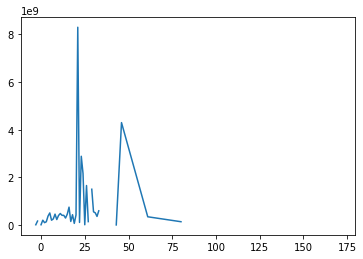

In [200]:
#best year into company to sell
data.groupby(data.acquired_at.dt.year - data.founded_at.dt.year).price_amount.mean().plot()

<AxesSubplot:xlabel='time_running'>

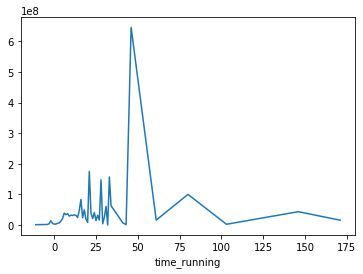

In [274]:
data['time_running'] = (data.acquired_at.dt.year - data.founded_at.dt.year)
data.groupby(data.time_running).funding_total_usd.mean().plot()
#how long does it take a company to reach the highest funding total?

In [311]:
data.groupby(data.status).funding_total_usd.median().plot(type='bar')
#why do aquired companied raise more than operating ones?

AttributeError: 'Line2D' object has no property 'type'

In [312]:
data.head(50)

,Unnamed: 0,name,funding_total_usd,status,State_code,City,funding_rounds,founded_at,first_funding_at,hasWebsite,company_name,acquirer_name,acquirer_country_code,acquirer_state_code,acquirer_city,acquired_at,price_amount,market,time_running
0,0,#waywire,1750000,acquired,NY,New York,1,2012-06-01,2012-06-30,True,#waywire,Waywire Networks,USA,NY,New York,2013-10-17,NaN,Art,1.0
1,1,CornerBlue,300000,operating,CA,Santa Monica,1,2006-02-22,2011-01-06,True,NaN,NaN,NaN,NaN,NaN,NaT,NaN,Online_Tech,NaN
2,2,Cornerstone OnDemand,44700000,operating,CA,Santa Monica,2,1999-11-01,2007-09-17,True,NaN,NaN,NaN,NaN,NaN,NaT,NaN,Corporate_Services,NaN
3,3,Cornerstone Pharmaceuticals,19179100,operating,NJ,Cranbury,4,2000-01-01,2008-12-15,True,NaN,NaN,NaN,NaN,NaN,NaT,NaN,Medical,NaN
4,4,Cornice,148000000,operating,CO,Longmont,2,2000-08-21,2004-02-27,True,NaN,NaN,NaN,NaN,NaN,NaT,NaN,Online_Tech,NaN
5,5,CorNova,7885000,operating,MA,Burlington,3,2003-10-01,2009-12-11,True,NaN,NaN,NaN,NaN,NaN,NaT,NaN,Medical,NaN
6,6,Corona Labs,3000000,acquired,CA,Palo Alto,3,2008-01-01,2009-12-01,True,Corona Labs,Fuse Powered Inc.,CAN,ON,Toronto,2014-11-04,NaN,Online_Tech,6.0
7,7,Coronado Biosciences,62758534,operating,WA,Seattle,5,2006-01-01,2009-08-04,True,NaN,NaN,NaN,NaN,NaN,NaT,NaN,Medical,NaN
8,8,Addapp,1800000,operating,CA,San Francisco,1,2014-04-03,2014-04-04,True,NaN,NaN,NaN,NaN,NaN,NaT,NaN,Online_Tech,NaN
9,9,CORP80,100000,operating,OH,Delaware,1,2012-01-01,2012-11-03,True,NaN,NaN,NaN,NaN,NaN,NaT,NaN,Online_Tech,NaN


In [ ]:
data[]

<AxesSubplot:xlabel='market'>

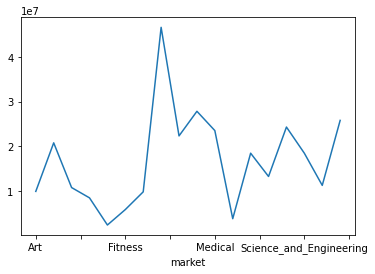

In [220]:
data.groupby(data.market).funding_total_usd.mean().plot()

In [294]:
funding_mean = data.groupby(data.market).funding_total_usd.mean()
selling_mean = data.groupby(data.market).price_amount.mean()
time_running_mean = data.groupby(data.market).time_running.mean()
price_by_time_running_mean = data.groupby(data.market).mean()['price_amount']/data.groupby(data.market).mean()['time_running']

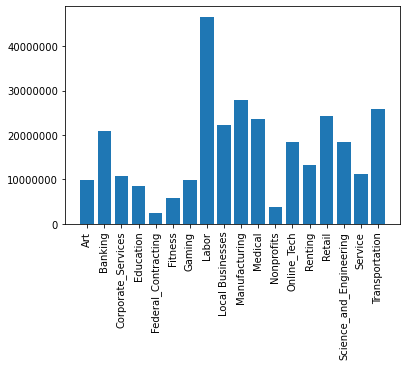

In [287]:
plt.xticks(rotation=90)
plt.ticklabel_format(style = 'plain')
ax = plt.bar(funding_mean.index,funding_mean.values) 
#average amount of funding per market

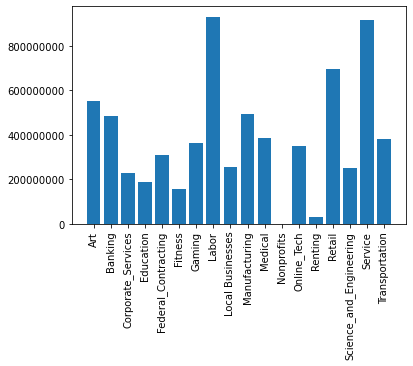

In [271]:
plt.xticks(rotation=90)
plt.ticklabel_format(style = 'plain')
ax = plt.bar(selling_mean.index,selling_mean.values) 
#average company sale


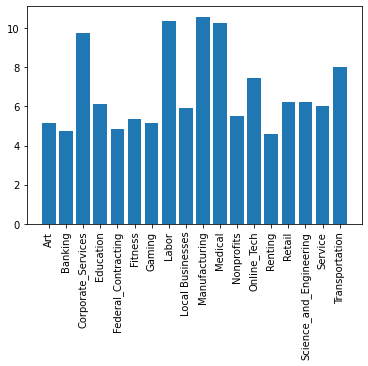

In [288]:
plt.xticks(rotation=90)
ax = plt.bar(time_running_mean.index,time_running_mean.values)
#average company lifespan

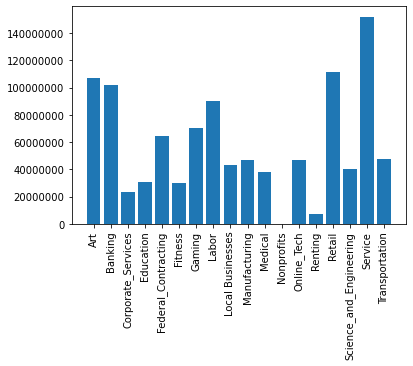

In [295]:
plt.xticks(rotation=90)
plt.ticklabel_format(style = 'plain')
ax = plt.bar(price_by_time_running_mean.index,price_by_time_running_mean.values) 
#per year value of the company increase
price they buy dividdd the number of years